## AULA - PREPARAÇÃO BÁSICA DE DADOS PARA MINERAÇÃO

#### Big Data & Analytics, PUCPR
#### Prof. Jean Paul Barddal, 2017

Nesta aula, utilizaremos a base de dados da Enron para conhecer 
algumas bibliotecas bastante úteis de Python para tratamento e 
prepação de dados.

Nos anos 2000, a Enron era uma das maiores empresas dos Estados Unidos. Em 2002, ela quebrou devido a uma fraude de grande escala. Como resultado de uma investigação federal, uma quantidade significante de dados confidenciais se tornaram públicos, incluindo dezenas de milhares de e-mails e informações financeiras para muitos executivos da empresa.
Nosso objetivo nesta aula é a de preparar os dados para que eles 
sejam usados para treinar um modelo de classificação que seja 
capaz de prever se uma pessoa é um não um POI no contexto do escândalo da Enron.

Como etapas desta aula, elenca-se:
    
1. Carregamento dos dados
2. Verificação dos tipos dos dados
3. Estatísticas básicas dos dados
4. Contagem de POIs
5. Contagem de valores faltantes
6. Remoção de valores faltantes
7. Imputação
8. Identificação e remoção de outliers
9. Criação de um novo atributo
10. Escala dos dados
11. Classificadores
13. Avaliação
14. Validação


#### Carregamento de pacotes

Neste projeto, vamos usar os seguintes pacotes:
* pandas (carregamento e tratamento de dados)
* matplotlib (para gráficos)
* scikit-learn (aprendizagem de máquina)

In [5]:
# por enquanto, vamos carregar apenas o pandas e o numpy
import pandas as pd
import numpy as np

# vamos carregar também o método display
from IPython.display import display


#### Carregamento de dados

In [6]:
df = pd.read_csv("enron.csv")

#### Tipos dos dados


In [7]:
df.dtypes

name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

** Notem que temos dois tipos de dados aqui: **
* Dados financeiros:

In [8]:
financial_features = ['salary', 'deferral_payments', 'total_payments',
                     'loan_advances', 'bonus',
                     'restricted_stock_deferred', 'deferred_income',
                     'total_stock_value', 'expenses',
                     'exercised_stock_options', 'other',
                     'long_term_incentive', 'restricted_stock', 'director_fees']

* Dados sobre emails:

In [9]:
email_features = ['to_messages', 'email_address',
                 'from_poi_to_this_person', 'from_messages', 
                  'from_this_person_to_poi', 'shared_receipt_with_poi']

#### Estatísticas dos dados


In [10]:
df.describe()
print("Nós temos {} por {}".format(df.shape[0], df.shape[1]))

Nós temos 146 por 22


#### Contagem de POIs


In [11]:
df["poi"].sum()

18

#### Contagem de valores faltantes


In [12]:
display(df.isnull().sum(1))
display(df.isnull().sum())

0       2
1      15
2       5
3       9
4       9
5      13
6       7
7       4
8      14
9      13
10      5
11      8
12      5
13      5
14     16
15      5
16     12
17      5
18     10
19      4
20      5
21      6
22      5
23     16
24     16
25     17
26      5
27     11
28      5
29     12
       ..
116     5
117     6
118     4
119     5
120    11
121     6
122     5
123    12
124    12
125     7
126     7
127    18
128     5
129     5
130     6
131    10
132    16
133    17
134     5
135    15
136     4
137    11
138    18
139     5
140    11
141    16
142    17
143    18
144    12
145    16
dtype: int64

name                           0
bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

**Atenção:** A maioria dos classificadores não trabalha bem com valores faltantes. Então devemos tratá-los de alguma forma. Vamos trabalhar da seguinte forma aqui: caso um atributo possua mais de 40% de seus valores faltantes, vamos removê-lo, caso contrário, vamos imputar seus valores com a média dos valores restantes.

##### - Removendo atributos com mais de 50% de valores faltantes

In [13]:
atributosRemovidos = []

for att in df.columns.values:
    numFaltantes = df[att].isnull().sum()
    pctFaltante = float(numFaltantes) / len(df)
    
    if(pctFaltante > 0.5):
        atributosRemovidos.append(att)
    
print(atributosRemovidos)

df.drop(atributosRemovidos, axis = 1, inplace = True)
display(df)

['deferral_payments', 'deferred_income', 'director_fees', 'loan_advances', 'long_term_incentive', 'restricted_stock_deferred']


,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4175000.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,152.0,False,126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
1,BADUM JAMES P,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,182466.0,257817.0
2,BANNANTINE JAMES M,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,864523.0,False,1757552.0,477.0,465.0,566.0,916197.0,5243487.0
3,BAXTER JOHN C,1200000.0,NaN,6680544.0,11200.0,NaN,NaN,NaN,2660303.0,False,3942714.0,267102.0,NaN,NaN,5634343.0,10623258.0
4,BAY FRANKLIN R,400000.0,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,69.0,False,145796.0,239671.0,NaN,NaN,827696.0,63014.0
5,BAZELIDES PHILIP J,NaN,NaN,1599641.0,NaN,NaN,NaN,NaN,874.0,False,NaN,80818.0,NaN,NaN,860136.0,1599641.0
6,BECK SALLY W,700000.0,sally.beck@enron.com,NaN,37172.0,4343.0,144.0,386.0,566.0,False,126027.0,231330.0,2639.0,7315.0,969068.0,126027.0
7,BELDEN TIMOTHY N,5249999.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,210698.0,True,157569.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
8,BELFER ROBERT,NaN,NaN,3285.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,102500.0,-44093.0
9,BERBERIAN DAVID,NaN,david.berberian@enron.com,1624396.0,11892.0,NaN,NaN,NaN,NaN,False,869220.0,216582.0,NaN,NaN,228474.0,2493616.0


##### - Imputando os valores restantes com a média

In [14]:
for att in df.columns.values:
    if(df[att].dtype == np.int64 or df[att].dtype == np.float64):
        media = df[att].mean()
        df[att] = df[att].fillna(media)

display(df)

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,ALLEN PHILLIP K,4.175000e+06,phillip.allen@enron.com,1.729541e+06,1.386800e+04,2195.000000,47.000000,65.000000,1.520000e+02,False,1.260270e+05,2.019550e+05,1407.000000,2902.000000,4.484442e+06,1.729541e+06
1,BADUM JAMES P,2.374235e+06,NaN,2.578170e+05,3.486000e+03,608.790698,64.895349,41.232558,9.190650e+05,False,2.321741e+06,5.621943e+05,1176.465116,2073.860465,1.824660e+05,2.578170e+05
2,BANNANTINE JAMES M,2.374235e+06,james.bannantine@enron.com,4.046157e+06,5.630100e+04,29.000000,39.000000,0.000000,8.645230e+05,False,1.757552e+06,4.770000e+02,465.000000,566.000000,9.161970e+05,5.243487e+06
3,BAXTER JOHN C,1.200000e+06,NaN,6.680544e+06,1.120000e+04,608.790698,64.895349,41.232558,2.660303e+06,False,3.942714e+06,2.671020e+05,1176.465116,2073.860465,5.634343e+06,1.062326e+07
4,BAY FRANKLIN R,4.000000e+05,frank.bay@enron.com,5.987054e+06,1.291420e+05,608.790698,64.895349,41.232558,6.900000e+01,False,1.457960e+05,2.396710e+05,1176.465116,2073.860465,8.276960e+05,6.301400e+04
5,BAZELIDES PHILIP J,2.374235e+06,NaN,1.599641e+06,1.087289e+05,608.790698,64.895349,41.232558,8.740000e+02,False,2.321741e+06,8.081800e+04,1176.465116,2073.860465,8.601360e+05,1.599641e+06
6,BECK SALLY W,7.000000e+05,sally.beck@enron.com,5.987054e+06,3.717200e+04,4343.000000,144.000000,386.000000,5.660000e+02,False,1.260270e+05,2.313300e+05,2639.000000,7315.000000,9.690680e+05,1.260270e+05
7,BELDEN TIMOTHY N,5.249999e+06,tim.belden@enron.com,9.531360e+05,1.735500e+04,484.000000,228.000000,108.000000,2.106980e+05,True,1.575690e+05,2.139990e+05,5521.000000,7991.000000,5.501630e+06,1.110705e+06
8,BELFER ROBERT,2.374235e+06,NaN,3.285000e+03,1.087289e+05,608.790698,64.895349,41.232558,9.190650e+05,False,2.321741e+06,5.621943e+05,1176.465116,2073.860465,1.025000e+05,-4.409300e+04
9,BERBERIAN DAVID,2.374235e+06,david.berberian@enron.com,1.624396e+06,1.189200e+04,608.790698,64.895349,41.232558,9.190650e+05,False,8.692200e+05,2.165820e+05,1176.465116,2073.860465,2.284740e+05,2.493616e+06


#### Identificação e remoção de outliers


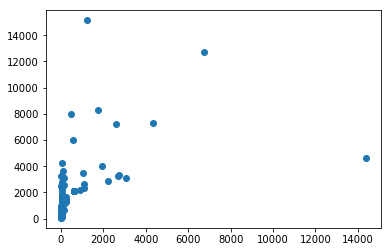

In [15]:
# para gráficos, vamos importar o matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


### primeiramente, vamos dar uma olhada em atributos de emails
plt.scatter(df["from_messages"], df["to_messages"])

Temos 3 pontos mais "isolados" e que parecem ser muito diferentes dos demais.
Dois deles possuem os maiores valores para `to_messages`, e o outro para `from_messages`.

In [23]:
# vamos ordenar os nossos dados por `from_messages` em ordem decrescente
outliers_from_messages = df.sort_values(["from_messages"], ascending = False)

display(outliers_from_messages.head())

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
72,KAMINSKI WINCENTY J,400000.0,vince.kaminski@enron.com,8.500100e+05,83585.0,14368.0,41.0,171.0,4669.0,False,126027.0,275101.0,583.0,4607.0,1086821.0,976037.0
73,KEAN STEVEN J,1000000.0,steven.kean@enron.com,2.022048e+06,41953.0,6759.0,140.0,387.0,1231.0,False,4131594.0,404338.0,3639.0,12754.0,1747522.0,6153642.0
6,BECK SALLY W,700000.0,sally.beck@enron.com,5.987054e+06,37172.0,4343.0,144.0,386.0,566.0,False,126027.0,231330.0,2639.0,7315.0,969068.0,126027.0
31,DELAINEY DAVID W,3000000.0,david.delainey@enron.com,2.291113e+06,86174.0,3069.0,66.0,609.0,1661.0,True,1323148.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
89,MCCONNELL MICHAEL S,1100000.0,mike.mcconnell@enron.com,1.623010e+06,81364.0,2742.0,92.0,194.0,540.0,False,1478269.0,365038.0,2189.0,3329.0,2101364.0,3101279.0


Parece que o Sr. Kaminski gostava bastante de enviar e-mails, mas ele não parece ser um outlier.

Vamos agora analizar a variável `to_messages`:

In [24]:
outliers_to_messages = df.sort_values(["to_messages"], ascending = False)

display(outliers_to_messages.head())

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
117,SHAPIRO RICHARD S,650000.0,richard.shapiro@enron.com,6.078370e+05,137767.0,1215.0,74.0,65.0,705.0,False,379164.0,269076.0,4527.0,15149.0,1057548.0,987001.0
73,KEAN STEVEN J,1000000.0,steven.kean@enron.com,2.022048e+06,41953.0,6759.0,140.0,387.0,1231.0,False,4131594.0,404338.0,3639.0,12754.0,1747522.0,6153642.0
75,KITCHEN LOUISE,3100000.0,louise.kitchen@enron.com,8.104200e+04,5774.0,1728.0,251.0,194.0,93925.0,False,466101.0,271442.0,3669.0,8305.0,3471141.0,547143.0
7,BELDEN TIMOTHY N,5249999.0,tim.belden@enron.com,9.531360e+05,17355.0,484.0,228.0,108.0,210698.0,True,157569.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
6,BECK SALLY W,700000.0,sally.beck@enron.com,5.987054e+06,37172.0,4343.0,144.0,386.0,566.0,False,126027.0,231330.0,2639.0,7315.0,969068.0,126027.0


Novamente, mais um alarme falso, parece que o Sr. Shapiro recebia muitos e-mails, mas não é um outlier.

Bem, nós poderíamos continuar com esse processo para analizar cada variável, mas vamos analizar pelo menos mais duas.
Agora, vamos escolher duas variáveis financeiras: `expenses` e `salary`.

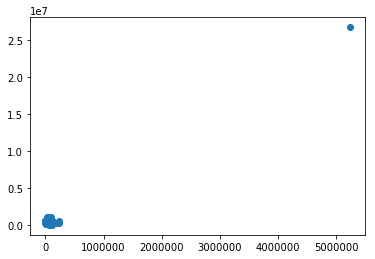

In [26]:
plt.scatter(df["expenses"], df["salary"])

Bem, isso parece um pouco bizarro, não? Nós temos um ponto **MUITO** diferente dos demais.
Vamos repetir o processo que usamos anteriormente para verificar qual dado é este:

In [28]:
outliers_from_expenses = df.sort_values(["expenses"], ascending = False)
display(outliers_from_expenses.head())

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
130,TOTAL,9.734362e+07,NaN,3.117640e+08,5235198.0,608.790698,64.895349,41.232558,4.266759e+07,False,1.303223e+08,2.670423e+07,1176.465116,2073.860465,309886585.0,4.345095e+08
88,MCCLELLAN GEORGE,9.000000e+05,george.mcclellan@enron.com,5.067650e+05,228763.0,49.000000,52.000000,0.000000,5.158700e+04,False,4.410960e+05,2.634130e+05,1469.000000,1744.000000,1318763.0,9.478610e+05
132,URQUHART JOHN A,2.374235e+06,NaN,5.987054e+06,228656.0,608.790698,64.895349,41.232558,9.190650e+05,False,2.321741e+06,5.621943e+05,1176.465116,2073.860465,228656.0,6.773957e+06
116,SHANKMAN JEFFREY A,2.000000e+06,jeffrey.shankman@enron.com,1.441898e+06,178979.0,2681.000000,94.000000,83.000000,1.191000e+03,False,6.301370e+05,3.041100e+05,1730.000000,3221.000000,3038702.0,2.072035e+06
117,SHAPIRO RICHARD S,6.500000e+05,richard.shapiro@enron.com,6.078370e+05,137767.0,1215.000000,74.000000,65.000000,7.050000e+02,False,3.791640e+05,2.690760e+05,4527.000000,15149.000000,1057548.0,9.870010e+05


Ahá, essa linha é apenas um agregado das demais. 
Na prática, este dado deve ser removido, pois ele não representa um indivíduo!

In [29]:
outliers_from_salary = df.sort_values(["salary"], ascending = False)
display(outliers_from_salary.head())

,name,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
130,TOTAL,97343619.0,NaN,311764000.0,5235198.0,608.790698,64.895349,41.232558,4.266759e+07,False,1.303223e+08,26704229.0,1176.465116,2073.860465,309886585.0,434509511.0
122,SKILLING JEFFREY K,5600000.0,jeff.skilling@enron.com,19250000.0,29336.0,108.000000,88.000000,30.000000,2.212200e+04,True,6.843672e+06,1111258.0,2042.000000,3627.000000,8682716.0,26093672.0
79,LAY KENNETH L,7000000.0,kenneth.lay@enron.com,34348384.0,99832.0,36.000000,123.000000,16.000000,1.035973e+07,True,1.476169e+07,1072321.0,2411.000000,4273.000000,103559793.0,49110078.0
47,FREVERT MARK A,2000000.0,mark.frevert@enron.com,10433518.0,86987.0,21.000000,242.000000,6.000000,7.427621e+06,False,4.188667e+06,1060932.0,2979.000000,3275.000000,17252530.0,14622185.0
105,PICKERING MARK R,300000.0,mark.pickering@enron.com,28798.0,31653.0,67.000000,7.000000,0.000000,9.190650e+05,False,2.321741e+06,655037.0,728.000000,898.000000,1386690.0,28798.0


Vamos ver o gráfico sem esse outlier:

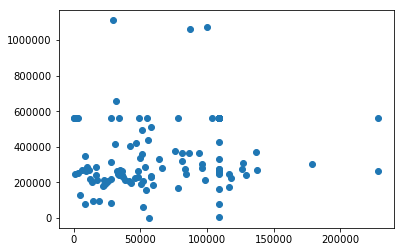

In [31]:
df = df[df["name"] != "TOTAL"]

plt.scatter(df["expenses"], df["salary"])

#### DESAFIOS
Existem vários outliers neste conjunto de dados, mas dois são bem fáceis de encontrar:
1. Um possui todos os seus valores faltantes.
2. E o outro também não é um indivíduo.

Como atividade extra, considere continuar trabalhando na base de dados para encontrar estes dados e removê-los.

Além destes dois outliers, nós podemos continuar nossa análise usando outros métodos estatísticos um pouco mais interessantes.
Um exemplo seria usar o método IQR ([Inter-Quartile Range](https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr)). Normalmente, este método nos ajuda a encontrar outliers de forma bastante rápida.
Como você verá no link acima, é bastante fácil executá-lo usando o pandas!

**Nota: não esqueça que não podemos remover POIs desta base de dados, caso contrário, a tarefa de aprendizagem se tornará ainda mais difícil pois estaremos desbalanceando ainda mais o problema!**

#### Seleção básica de atributos


Como vemos acima, existem três atributos do tipo `object`. Se abrirmos nossos dados no excel, veremos que dois destes dados são apenas `strings` e o outro é nossa classe, `poi`.
Aqui, temos que tomar cuidado e pensar nas seguintes possibilidades:
1. Os dados são `string`, mas trata-se de um atributo categórico.
2. Os dados são `string` e são inúteis.
3. Os dados são `string` e necessitam de tratamento especial.
4. O dado pode ser convertido para valores numéricos discretos.

* No caso #1, vamos precisar usar um processamento como [OneHotEncoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) antes de efetivamente realizar a aprendizagem. Note que no WEKA, isso não é necessário, mas caso usem o `scikit-learn`, isso é necessário.
* No caso #2, que é o que ocorre neste projeto, podemos apenas remover os atributos.
* No caso #3, precisamos tratar os dados usando [Bag of Words](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words) e/ou [TF-IDF](https://stackoverflow.com/questions/37593293/what-is-the-simplest-way-to-get-tfidf-with-pandas-dataframe).
* No caso #4, podemos simplesmente substituir os valores de outros tipos para que eles se tornem numéricos, como por exemplo, `True por 1` e `False por 0`.

Felizmente, os atributos `email_address` e `name` são strings que funcionam como identificadores, e este tipo de dado não ajuda na **generalização**, então vamos removê-los:

In [32]:
# remoção de email e name
df.drop(["name", "email_address"], axis = 1, inplace = True)

In [ ]:
# vamos agora substituir os True e False para que se tornem valores numéricos


#### Criação de um novo atributo

Muitas vezes, os atributos originais podem não ser suficientes, mas algumas pequenas transformações podem ser úteis e facilitar a vida de nossos classificadores. Uma técnica bastante comum é a criação de novos atributos. Para criar um novo atributo, precisamos apenas ter uma hipótese do por quê este novo atributo seja útil na nossa tarefa de classificação.

A seguir, vamos criar um novo atributo chamado `wealth`. Este atributo será simplesmente a soma de todos os atributos financeiros de uma pessoa. A hipótese neste caso é de que algumas pessoas podem ter salários baixos mas valores de bonificação altos, o que poderia ser um indicativo de fraude. Ao somar estas variáveis, nós (e o classificador) teremos uma melhor noção de quanto dinheiro cada pessoa realmente está ganhando.

In [ ]:
# vamos começar ao arrumar o vetor que inicializamos lá no topo do código, `financial_features`

# como removemos algumas variáveis, vamos pegar a interseção entre essas variáveis e as variáveis
# que temos agora no dataset


# `wealth` é a soma dos atributos financeiros


#### Escala dos dados


Vamos dar mais uma olhada nos valores mínimos e máximos de cada atributos que temos:

Note que existem atributos que estão na escala de `10E8`, enquanto existem alguns que estão na casa de dezenas de milhares.
Existem classificadores que podem ser afetados por isso, como o kNN!

O motivo disso é que o kNN se baseia em cálculos de distância, e a distância é proporcional aos valores máximos e mínimos que um atributo pode assumir.
Não vamos detalhar isso, mas imaginem o seguinte:

Queremos calcular a distância entre **dois pontos A e B**.

**Atributo A**: 
* Ponto 1: possui valor `10`
* Ponto 2: possui valor `1000`
* A distância (diferença), seria `1000-10 = 900`

**Atributo B**:
* Ponto 1: possui valor `1`
* Ponto 2: possui valor `10`
* A distância (diferença), seria `10-1 = 9`

Neste caso, o atributo A seria mais *impactante* no nosso cálculo de distância, e isso não é preferível se não conhecemos bem os dados. O ideal é que todos os dados possuam o mesmo *impacto*!

Uma boa prática, independentemente de ser necessário ou não, é sempre alterar a escala dos dados.
Vamos fazer isso usando o método [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

#### Classificadores


Determinar qual classificador deve ser usado não é uma tarefa simples.
Por mais que existam "dogmas" na área comentando que algoritmos baseados em 
instâncias são superiores quando possuímos apenas dados numéricos, não há 
prova formal que confirme tais afirmações.

Como devemos proceder? O ideal é testar diversos classificadores, sendo cada um de um tipo diferente (**bias**).
Por exemplo, podemos testar um classificador probabilístico ([Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), um baseado em árvore de decisão ([Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) e um baseado em instâncias ([kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# vamos criar uma lista com um classificador de cada tipo para testarmos na sequência


#### Avaliação


Normalmente, maior parte das pessoas trabalham com **acurácia** para determinar quão bom um classificador é.
Isso não está errado, mas ao usar essa métrica, temos que tomar cuidado.
Digamos que nós temos um classificador bem ingênuo que não aprendeu nada, e para cada questionamento que fazemos para ele, ele nos afirma que um indivíduo **não é um POI**.
Lembre-se, na nossa base de dados, nós temos 18 indivíduos que são POIs e 128 que não são POIs.
Neste caso, a acurácia desse modelo seria de 128/146, significando que ele acertaria quase 90% dos dados.
Contudo, esse classificador jamais identificaria para nós sequer um POI!

* Como resolvemos isso de forma mais adequada?

Existem duas métricas que são utilizadas em problemas desbalanceados: **precision** e **recall**.

* **Precision:** Precision é a proporção de POIs que foram identificados corretamente, em relação a todos os POIs que nosso classificador identificou.
* **Recall:** Recall é a proporção dos POIs que foram identificados em relação a todos os POIs da base.

Para saber mais, dê uma olhada [aqui](https://en.wikipedia.org/wiki/Precision_and_recall) e [aqui](https://hackercollider.com/articles/2016/06/03/recall-vs-precision/)!




#### Validação

A idéia geral de criar modelos preditivos é que estes sejam capazes de **generalizar** bem.
Deste modo, após criar um modelo, nós devemos testá-lo usando dados **diferentes** dos usados durante o treinamento.
Existem diversas formas de fazer isso, mas como o nosso dataset é pequeno, a opção mais interessante é usar [validação cruzada](https://pt.wikipedia.org/wiki/Validação_cruzada).
Contudo, existe uma variação de validação cruzada que é ainda mais interessante e que faz muito sentido neste projeto: uma validação cruzada [estratificada](https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation). Este procedimento tem como objetivo fazer com que cada *fold* possua a mesma distribuição de classes que o dataset original.

Vamos agora usar esse procedimento para testar os três classificadores e verificar os resultados em termos de **precision** e **recall**.

In [ ]:
#### Código para teste de um classificador usando validação cruzada estratificada

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

def evaluateClassifier(clf, dataset, folds = 5):
    X = dataset.drop('poi', axis = 1).values
    X = StandardScaler().fit_transform(X) # escala de dados
    y = dataset['poi'].values
    cv = StratifiedShuffleSplit(y, random_state=42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_indices, test_indices in cv:
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        ### treinamento do classificador
        clf.fit(X_train, y_train)

        ### obtenção de predições para os dados de teste
        predictions = clf.predict(X_test)
        
        ### cálculo da matriz de confusão
        for prediction, truth in zip(predictions, y_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print("Erro! Encontramos um valor diferente de 0 ou 1!")
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
    except:
        print("Houve uma divisão por zero!")
    print("{} \n \t Accuracy = {} \n \t Precision = {} \n \t Recall = {}\n\n".format(clf, accuracy, precision, recall))        

#### PRÓXIMOS PASSOS - TUNING

Muitos classificadores dependes de seus parâmetros. Um exemplo é o SVM, onde os parâmetros padrão normalmente não dão resultados bons. 
Os resultados que obtivemos acima são razoáveis, pois existem muitos processos a mais de limpeza e criação de novos atributos que poderíamos ter feito.
Outra forma de tentar melhorar os nossos resultados é através de **tuning**, onde podemos avaliar diferentes parametrizações para um classificador e manter apenas a que nos dá melhores resultados.
Como trabalho extra, experimente usar o método [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para tunar os 3 classificadores que usamos acima, e compare os resultados obtidos com os originais.

#### PRÓXIMOS PASSOS - SELEÇÃO AUTOMÁTICA DE ATRIBUTOS

Neste projeto, nós estamos lidando com uma base de dados razoavelmente pequena, seja em número de instâncias, seja em número de atributos. Contudo, nós temos atributos nesta base de dados que são inúteis, e outros acabam até mesmo atrapalhando. Deste modo, selecionar atributos é uma tarefa extremamente importante e que nos ajudaria e muito a obter melhores resultados.
Infelizmente, o scikit-learn original não inclui muitos métodos de seleção de atributos, mas cito aqui o [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) como um bastante útil e rápido. 
Sugiro neste ponto testar diferentes números de atributos a serem obtidos pelo `SelectKBest` e testados na criação de um classificador.
Por exemplo:
* kNN com 3 atributos obtidos pelo `SelectKBest`
* kNN com 4 atributos obtidos pelo `SelectKBest`
* kNN com 5 atributos obtidos pelo `SelectKBest`


#### PRÓXIMOS PASSOS - COMBINANDO SELEÇÃO DE ATRIBUTOS E TUNING

Um fator bastante importante em aprendizagem de máquina é o viés indutivo (inductive bias) dos classificadores.
Ou seja, cada classificador "percebe" os dados de uma forma diferente, e assim, usa os mesmos atributos de formas diferentes para de fato extrair padrões e aprender um modelo preditivo.
Desta forma, seria interessante que cada classificador fosse tunado com diferentes conjuntos de atributos, unindo então o `GridSearch` e um método de seleção de atributos, como o `SelectKBest`.
Felizmente, isso é bastante fácil de se fazer ao usar a classe [Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).